### importo todo lo necesario para ejecutar el notebook a través de las distintas carpetas

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import pandas as pd
from scipy import stats

from src.load_data import load_data
from src.features import build_features,target_col,compare_distributions,FEATURES

### cargo los datos desde enero a diciembre

In [2]:
taxi_jan = load_data(year=2020, month=1)
taxi_feb = load_data(year=2020, month=2)
taxi_mar = load_data(year=2020, month=3)
taxi_abr = load_data(year=2020, month=4)
taxi_may = load_data(year=2020, month=5)
taxi_jun = load_data(year=2020, month=6)
taxi_jul = load_data(year=2020, month=7)
taxi_ago = load_data(year=2020, month=8)
taxi_sept = load_data(year=2020, month=9)
taxi_oct = load_data(year=2020, month=10)
taxi_nov = load_data(year=2020, month=11)
taxi_dic = load_data(year=2020, month=12)

In [3]:
taxi_jan = build_features(taxi_jan.sample(100000), target_col)
taxi_feb = build_features(taxi_feb.sample(100000), target_col)
taxi_mar = build_features(taxi_mar.sample(100000), target_col)
taxi_abr = build_features(taxi_abr.sample(100000), target_col)
taxi_may = build_features(taxi_may.sample(100000), target_col)
taxi_jun = build_features(taxi_jun.sample(100000), target_col)
taxi_jul = build_features(taxi_jul.sample(100000), target_col)
taxi_ago = build_features(taxi_ago.sample(100000), target_col)
taxi_sept = build_features(taxi_sept.sample(100000), target_col)
taxi_oct = build_features(taxi_oct.sample(100000), target_col)
taxi_nov = build_features(taxi_nov.sample(100000), target_col)
taxi_dic = build_features(taxi_dic.sample(100000), target_col)

### Aplicamos el modelo random forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [7]:
%%time
# Crear y entrenar el modelo Random Forest usando los datos preprocesados de enero FEATURES esta definido en el preprocesado
rfc_ene = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfc_ene.fit(taxi_jan[FEATURES], taxi_jan[target_col])

CPU times: total: 23.6 s
Wall time: 27.5 s


RandomForestClassifier(max_depth=10, random_state=42)

In [8]:
# Hacer predicciones con los datos de prueba de febrero y marzo
y_pred_feb = rfc_ene.predict(taxi_feb[FEATURES])
y_pred_mar = rfc_ene.predict(taxi_mar[FEATURES])

In [9]:
# Evaluar el modelo con los datos de prueba de febrero
accuracy_feb = accuracy_score(taxi_feb[target_col], y_pred_feb)
report_feb = classification_report(taxi_feb[target_col], y_pred_feb)

In [10]:
# Evaluar el modelo con los datos de prueba de marzo
accuracy_mar = accuracy_score(taxi_mar[target_col], y_pred_mar)
report_mar = classification_report(taxi_mar[target_col], y_pred_mar)

In [11]:
# Mostrar los resultados
print(f"Accuracy en febrero: {accuracy_feb}")
print(f"Reporte de clasificación para febrero:\n{report_feb}")

print(f"Accuracy en marzo: {accuracy_mar}")
print(f"Reporte de clasificación para marzo:\n{report_mar}")

Accuracy en febrero: 0.6002750700223871
Reporte de clasificación para febrero:
              precision    recall  f1-score   support

           0       0.67      0.13      0.21     42547
           1       0.59      0.95      0.73     57064

    accuracy                           0.60     99611
   macro avg       0.63      0.54      0.47     99611
weighted avg       0.63      0.60      0.51     99611

Accuracy en marzo: 0.5984696336760925
Reporte de clasificación para marzo:
              precision    recall  f1-score   support

           0       0.70      0.16      0.26     43954
           1       0.59      0.95      0.72     55630

    accuracy                           0.60     99584
   macro avg       0.64      0.55      0.49     99584
weighted avg       0.64      0.60      0.52     99584



# Estrategia sugerida
Se recomienda analizar las métricas obetnidas en los distintos meses y observar si estas varian en el tiempo. Luego, utilizar algún test estadistico para identiicar si las distribuciones de las características cambian significativamente entre los meses y no solo las métricas del modelo.

In [16]:
# Inicializar una lista para almacenar las métricas
metrics = []

# Evaluar el modelo con los datos de febrero a diciembre
for month in range(2, 13):
    taxi_test = load_data(2020, month)
    taxi_test = build_features(taxi_test.sample(100000), target_col)
    y_pred = rfc_ene.predict(taxi_test[FEATURES])
    
    # Calcular las métricas
    accuracy = accuracy_score(taxi_test[target_col], y_pred)
    precision = precision_score(taxi_test[target_col], y_pred)
    recall = recall_score(taxi_test[target_col], y_pred)
    f1 = f1_score(taxi_test[target_col], y_pred)
    
    # Añadir las métricas a la lista
    metrics.append({
        'Month': month,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame(metrics)

# Mostrar la tabla comparativa
print(metrics_df)

    Month  Accuracy  Precision    Recall  F1-Score
0       2  0.599962   0.594009  0.952140  0.731598
1       3  0.596539   0.584822  0.947156  0.723140
2       4  0.538065   0.473002  0.850637  0.607949
3       5  0.587618   0.477627  0.865373  0.615526
4       6  0.563242   0.503875  0.888362  0.643027
5       7  0.571607   0.521040  0.911560  0.663073
6       8  0.583738   0.538962  0.922464  0.680394
7       9  0.596711   0.567043  0.932397  0.705209
8      10  0.605789   0.584004  0.936332  0.719343
9      11  0.606902   0.585443  0.932610  0.719329
10     12  0.605926   0.580270  0.935508  0.716262


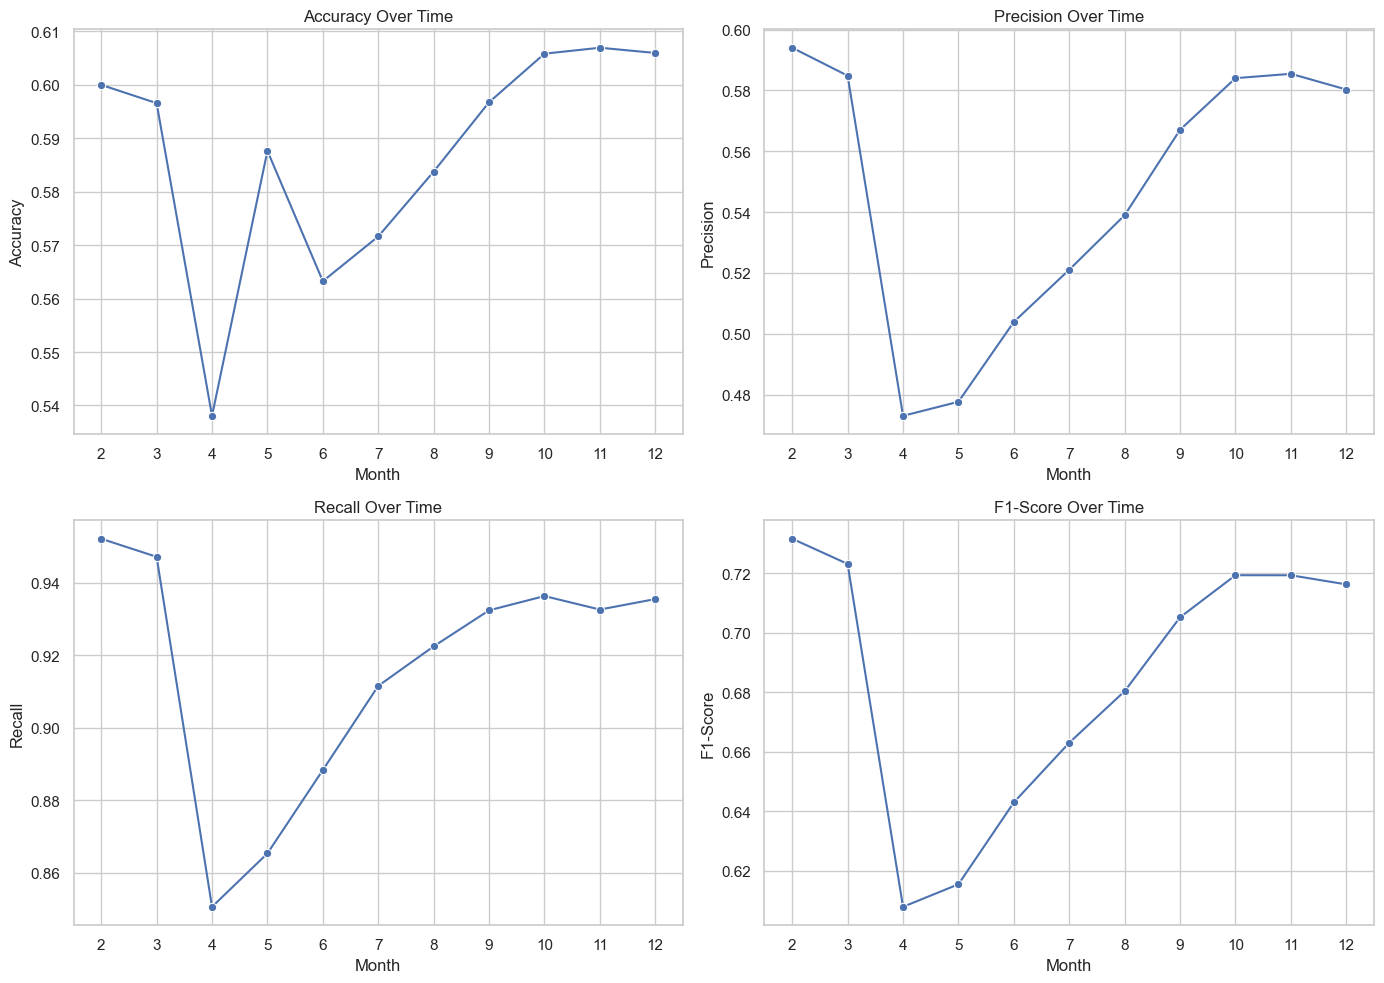

In [25]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura para los gráficos de líneas
plt.figure(figsize=(14, 10))

# Graficar Accuracy
plt.subplot(2, 2, 1)
sns.lineplot(x='Month', y='Accuracy', data=metrics_df, marker='o')
plt.title('Accuracy Over Time')
plt.xlabel('Month')
plt.ylabel('Accuracy')
plt.xticks(range(2, 13))

# Graficar Precision
plt.subplot(2, 2, 2)
sns.lineplot(x='Month', y='Precision', data=metrics_df, marker='o')
plt.title('Precision Over Time')
plt.xlabel('Month')
plt.ylabel('Precision')
plt.xticks(range(2, 13))

# Graficar Recall
plt.subplot(2, 2, 3)
sns.lineplot(x='Month', y='Recall', data=metrics_df, marker='o')
plt.title('Recall Over Time')
plt.xlabel('Month')
plt.ylabel('Recall')
plt.xticks(range(2, 13))

# Graficar F1-Score
plt.subplot(2, 2, 4)
sns.lineplot(x='Month', y='F1-Score', data=metrics_df, marker='o')
plt.title('F1-Score Over Time')
plt.xlabel('Month')
plt.ylabel('F1-Score')
plt.xticks(range(2, 13))

plt.tight_layout()
plt.show()

## Implementación del Test de Kolmogorov-Smirnov


In [18]:
from scipy import stats
import pandas as pd

# Comparamos las distribuciones entre enero y los otros meses
ks_results = []

for month in range(2, 13):
    taxi_test = load_data(2020, month)
    taxi_test = build_features(taxi_test.sample(100000), target_col)
    
    comparison_df = compare_distributions(taxi_jan, taxi_test)
    comparison_df['Month'] = month
    ks_results.append(comparison_df)

# Concatenar los resultados de KS en un DataFrame
ks_results_df = pd.concat(ks_results)

# Mostrar los resultados
ks_results_df

,feature,statistic,p_value,Month
0,pickup_weekday,0.049400,4.314430e-106,2
1,pickup_hour,0.009252,3.932869e-04,2
2,work_hours,0.030367,2.415588e-40,2
3,pickup_minute,0.002851,8.116714e-01,2
4,passenger_count,0.006204,4.302233e-02,2
...,...,...,...,...
6,trip_time,0.036795,5.532491e-59,12
7,trip_speed,0.069956,3.059248e-212,12
8,PULocationID,0.042122,3.577052e-77,12
9,DOLocationID,0.029700,1.414079e-38,12


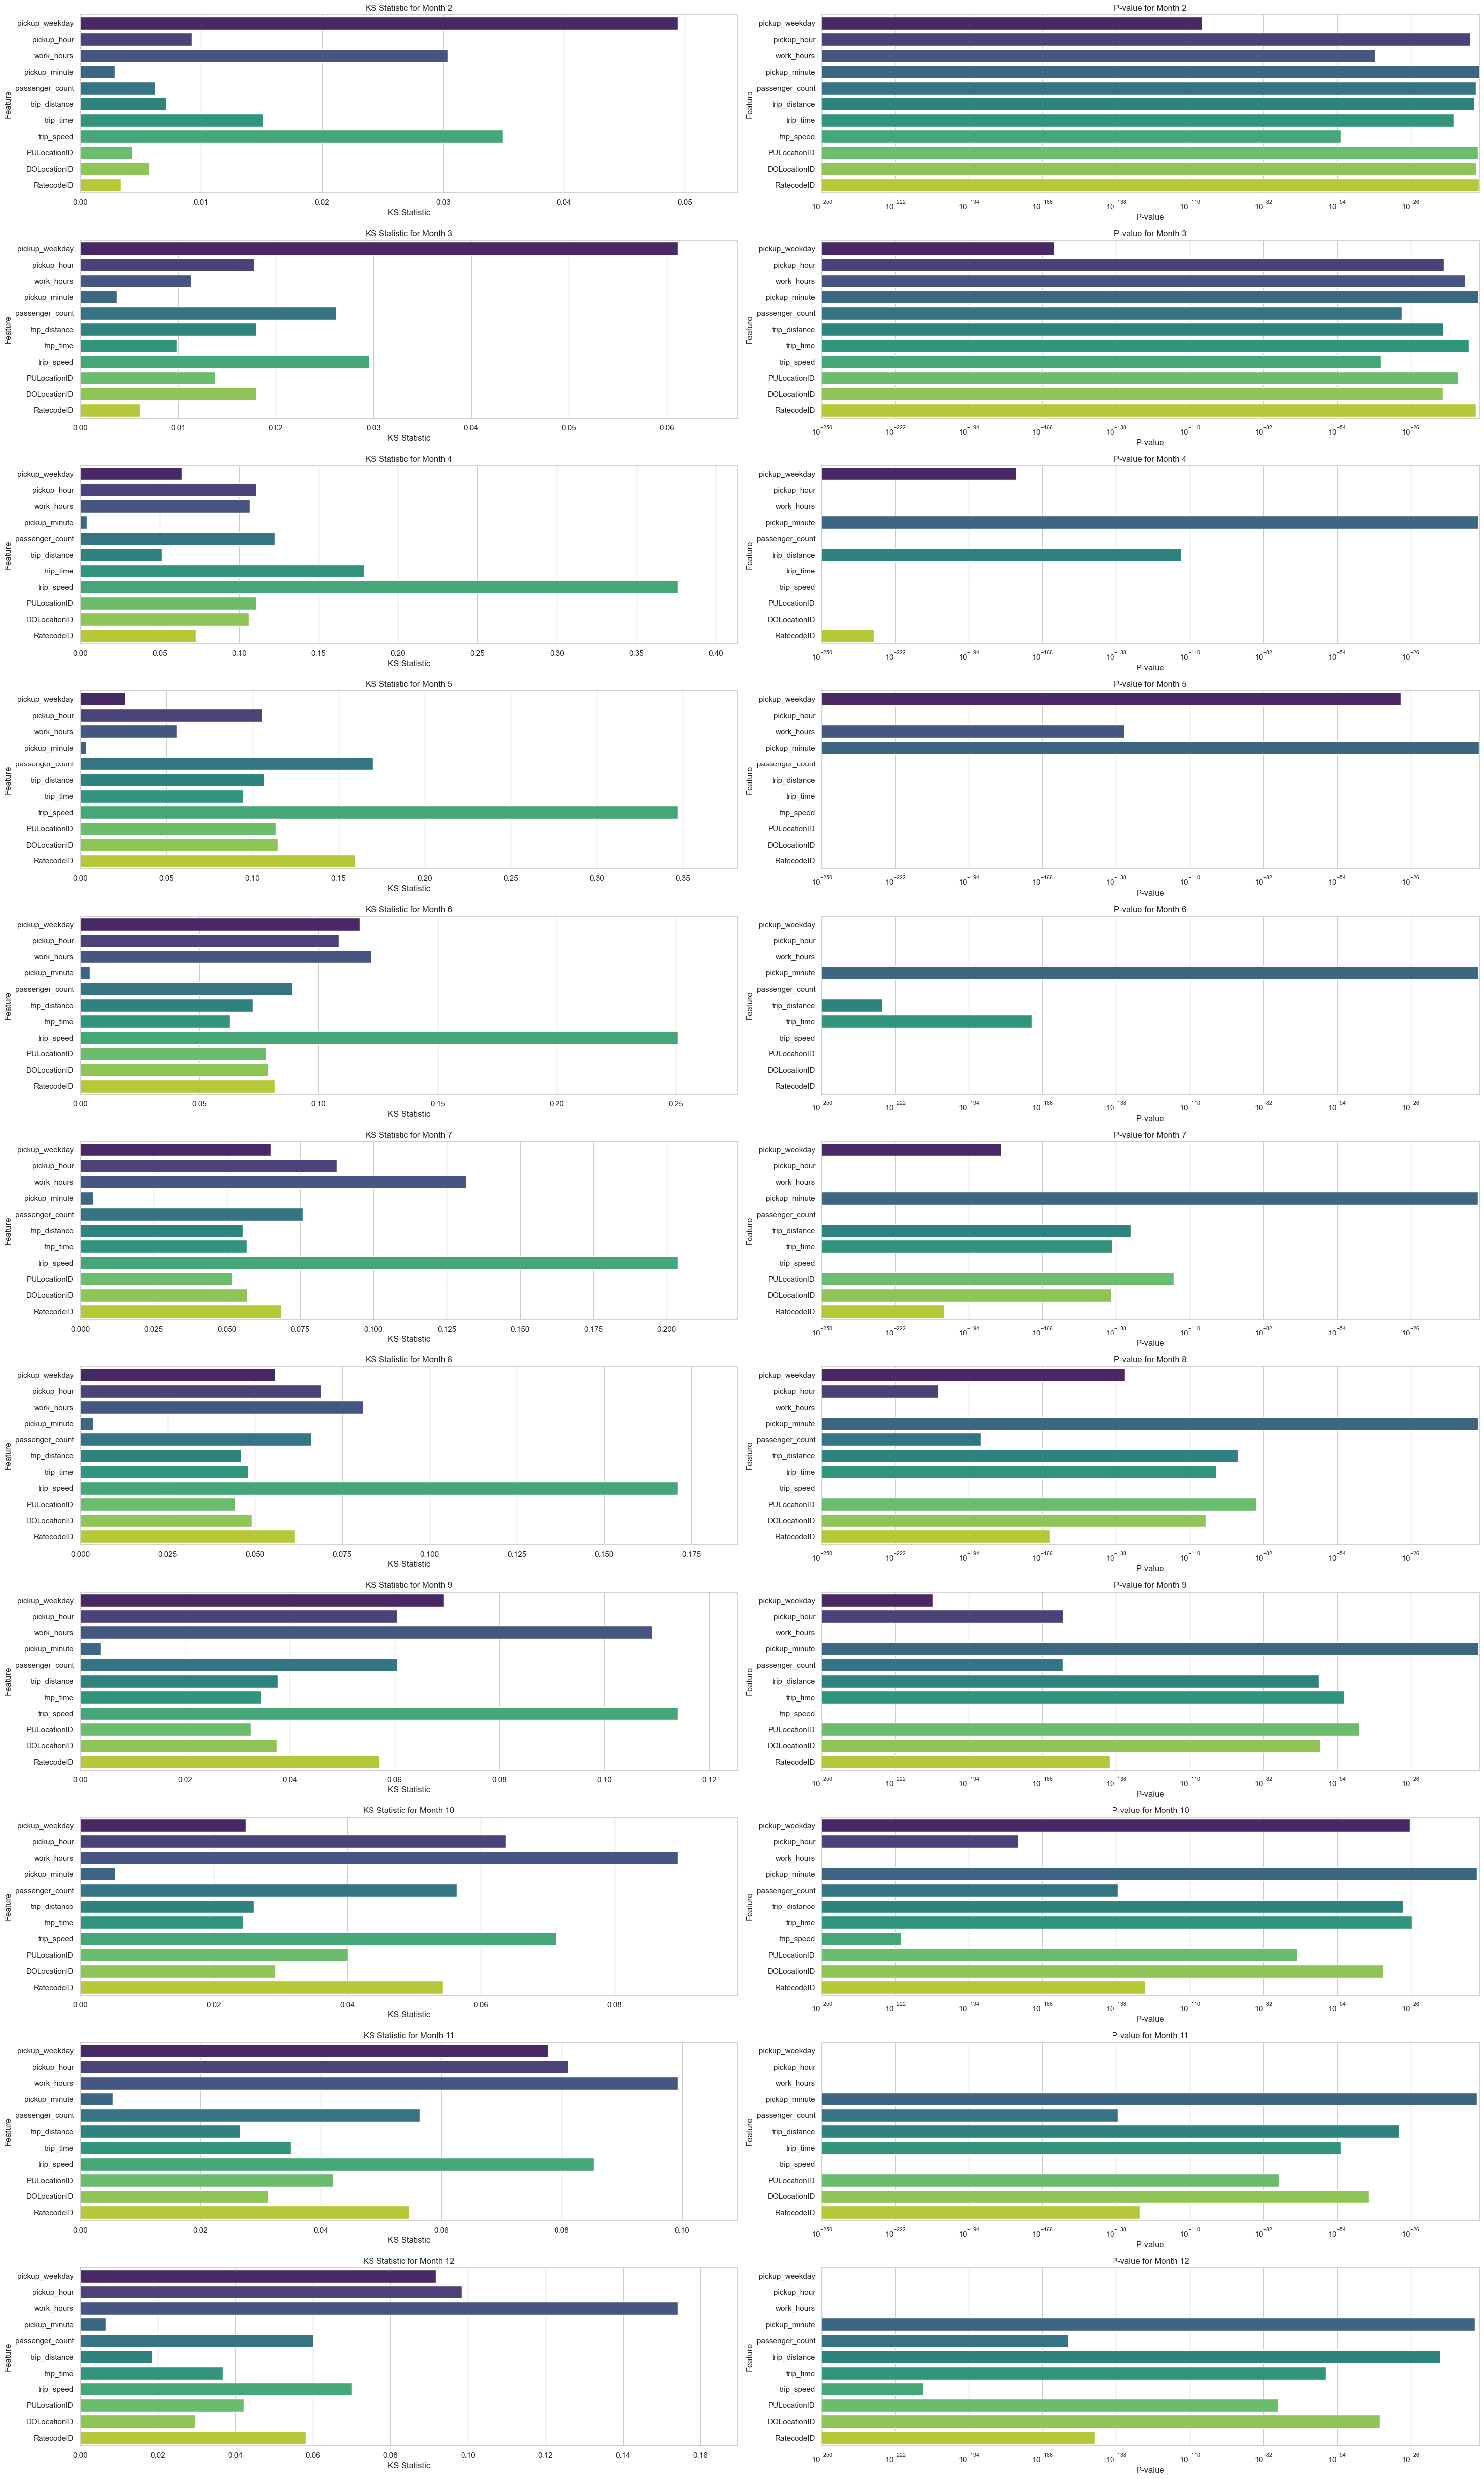

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura grande para acomodar todos los subgráficos
plt.figure(figsize=(30, 50))

# Gráficos de barras para cada mes
for month in range(2, 13):
    # Filtrar los resultados para el mes actual
    ks_month = ks_results_df[ks_results_df['Month'] == month]

    # Crear subgráfico para la estadística KS
    plt.subplot(11, 2, (month - 2) * 2 + 1)
    sns.barplot(data=ks_month, x='statistic', y='feature', palette='viridis')
    plt.title(f'KS Statistic for Month {month}')
    plt.xlabel('KS Statistic')
    plt.ylabel('Feature')
    plt.xlim(0, ks_month['statistic'].max() * 1.1)  # Ajustar el límite x para consistencia

    # Crear subgráfico para el p-valor
    plt.subplot(11, 2, (month - 2) * 2 + 2)
    sns.barplot(data=ks_month, x='p_value', y='feature', palette='viridis')
    plt.title(f'P-value for Month {month}')
    plt.xlabel('P-value')
    plt.ylabel('Feature')
    plt.xscale('log')  # Usar escala logarítmica para visualizar mejor los p-valores
    plt.xlim(1e-250, 1)  # Ajustar el límite x para consistencia

plt.tight_layout()
plt.show()

# Conclusiones:-
- Cambios Significativos en Datos: Las distribuciones de varias características cambian significativamente mes a mes en comparación con enero.
- Impacto en el Modelo: Estos cambios pueden explicar la variabilidad en el rendimiento del modelo. Por ejemplo, si trip_speed cambia significativamente, el modelo puede tener dificultades para generalizar.